# k-Nearest Neighbors
#### Ruixuan Dong

### Table of Contents

 - [The k-Nearest Neighors classification algorithm](#1)
    - [Algorithm Explanation](#11)
    - [An Intuitive Explanation](#12)
 - [Research Problem -- Using synthetic data to classify different systolic levels](#2)
    - [Overview of the Problem set](#21)
    - [Cosine Similarity](#22)
    - [Implement kNN on Synthetic data](#23)
 - [A Typical Example -- Dating DataSet ](#3)

<a name='1'></a>
### 1 - The k-Nearest Neighors classification algorithm

First, let's run the cell below to import all the packages that we will need during this tutorial.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import operator

<a name = '11'></a>
### 1-1 Algorithm Explanation

K-Nearest Neighbors classifier is memory-based, and require no model to be fit. Given a query point $x_0$, we find the $k$ training points $x_{(r)}$, $r = 1,...,k$ closest in distance to $x_0$, and then classify using majority vote among the $k$ neighbors. For simplicity we will assume that the features are real-valued, and we use Euclidean distance in feature space:

$$
d_{(i)} = || x_{(i)} - x_0 ||
$$

More specific, if the point has only 2 dimensions, i.e. it can be written as $x_0 = (x_{01}, x_{02})$, then the Euclidean distance can be verified as 

$$
d_{(i)} = \sqrt{(x_{(i1)} - x_{01})^2 + (x_{(i2)} - x_{02})^2 }
$$



Next, we give the summary of steps for kNN algorithm. For every point in our dataset:
 - calculate the distance between the query point $x_0$ and current points
 - sort the distances in increasing order
 - take $k$ items with lowest distances to $x_0$
 - find the majority class among these items
 - return the majority class as our prediction for the class of $x_0$

In [53]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),
     key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

<a name='12'></a>
### 1-2 An Intuitive Explanation

Here we would like to give an intuitive simple example for more straight-forward understanding. Firstly, we generate four 2-d points, which are $(1,1.1)$, $(1,1)$, $(0,0.1)$, $(0,0)$. Points $(1,1.1)$ and $(1,1)$ belong to class "A", while points $(0,0.1)$ and $(0,0)$ belong to class "B". 

The location of the current points is displayed in the figure below.

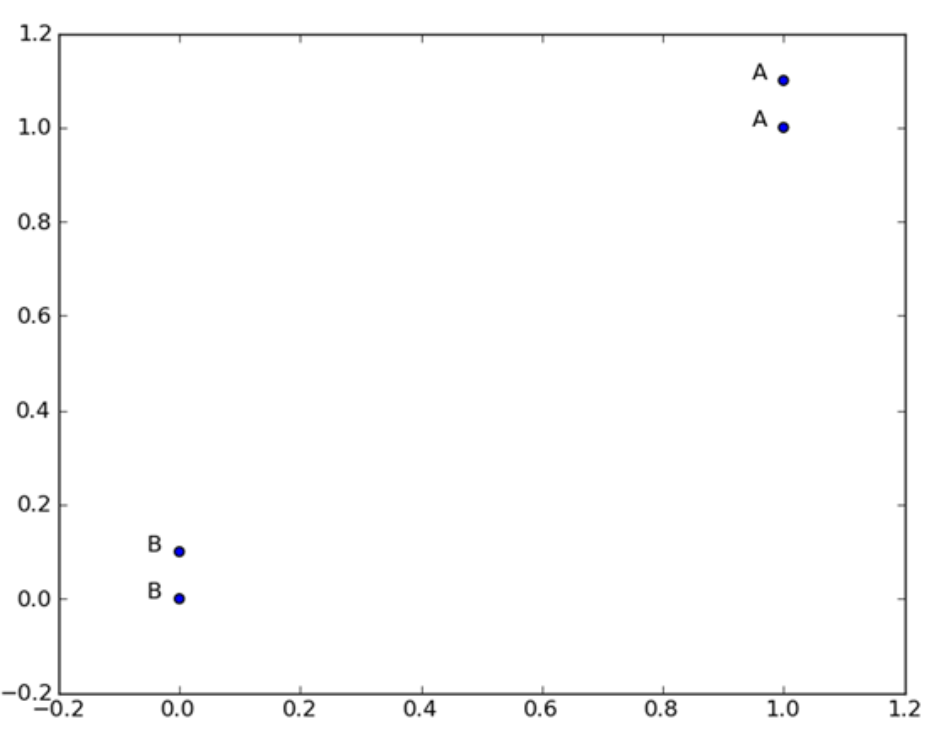

In [54]:
from IPython.display import Image
image_path = 'knn1.png'
Image(filename=image_path, width = 300, height = 200)

In [55]:
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [56]:
group, labels = createDataSet()
group, labels

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]),
 ['A', 'A', 'B', 'B'])

Now, we would like to input a new point $(0,0.2)$ and try to find out its class("A" or "B"). Intuitively, the class of this point belongs to "B", because the two points closest to it both belong to "B" category (if we set $k$ = 2). 

Now run the code below to use our knn algorithm function `classify0()` to verify our conclusion. 

In [32]:
classify0([0,0.2], group, labels, 2)

'B'

The result is indeed class "B", which does not contradict our intuitive conclusion.

<a name='2'></a>
### 2 - Using synthetic data to classify different systolic levels

In this part, we use the dataset generated by Synthetic SCG data generator https://github.com/wsonguga/DataDemo. In the data file, each row includes sensor data (10 seconds * 100Hz) + HeartRate + RespiratoryRate + SystolicBloodPressure + DiastolicBloodPressure.

Now we would like to give a introduction about the synthetic SCG dataset we generated. 

Based on Synthetic SCG data generator, we generated an artificial (synthetic) scg signal of a given duration (10 seconds, i.e. duration=10) and sampling rate (100Hz, i.e. sampling rate=100) using a model based on Daubechies wavelets to roughly approximate cardiac cycles.

Besides, we set 
 - heart rate to be randomly chosen from the intgers range from 50 to 150, with the desired heart rate standard deviation (beats per minute) equal to 1.
 - respiratory rate to be randomly chosen from the intgers range from 10 to 30
 - diastolic blood pressure to be randomly chosen from the intgers range from 60 to 100
 - systolic blood pressure to be randomly chosen from the intgers range from 90 to 180

The sample size of the current dataset is 6,000 in total.

<a name='21'></a>
### 2-1 Overview of the Problem set 

**Problem Statement:** The generated dataset containing: 
- a dataset set ("lower.csv") of 3,000 samples labeled as lower (90<=systolic blood pressure<140) 
- a dataset set ("higher.csv") of 3,000 samples labeled as higher (140<=systolic blood pressure<=180) 
- each sample is of shape (1, 1003) where 1003 is for the 1000-d signal and heart rate, respiratory rate and diastolic blood pressure

In this part, we will build a simple kNN classifier that can correctly classify samples as lower or higher (SBP).

Let's get more familiar with the dataset. Load the data by running the following code.

In [70]:
column_names = [str(i) for i in range(1, 1001)] + ['heart_rate', 'respiratory_rate', 'systolic', 'diastolic']
lower = pd.read_csv('lower.csv', 
                 header=None, 
                 names=column_names)
higher = pd.read_csv('higher.csv', 
                 header=None, 
                 names=column_names)
lower.head(3)

,1,2,3,4,5,6,7,8,9,10,...,995,996,997,998,999,1000,heart_rate,respiratory_rate,systolic,diastolic
0,5.139586e-08,1.719105e-07,7.191389e-07,0.000002,0.000005,0.000008,7.495314e-06,0.000003,-0.000003,-4.347612e-06,...,-3.436798e-08,-3.112611e-08,-2.767376e-08,-2.522975e-08,-2.428736e-08,-2.402337e-08,63.0,22.0,92.0,85.0
1,3.150065e-08,5.905880e-08,4.037412e-07,0.000002,0.000006,0.000006,-9.473591e-07,-0.000003,0.000002,7.632977e-07,...,-2.923634e-08,-2.760953e-08,-2.607332e-08,-2.368969e-08,-2.103697e-08,-1.968587e-08,85.0,10.0,137.0,100.0
2,4.678980e-08,1.790871e-07,9.236960e-07,0.000003,0.000007,0.000008,3.412019e-06,-0.000003,-0.000004,1.460292e-06,...,-3.445976e-08,-3.257060e-08,-3.042521e-08,-2.736746e-08,-2.438784e-08,-2.290102e-08,84.0,25.0,135.0,91.0


Now let's combine the two dataset in row and get the total dataset with 6,000 sample size. Before processing the data set, we fisrt check the distribution of systolic blood pressure among the whole dataset. Given the figure below, it is clear that the systolic blood pressure generated here is more like a "step". Therefore, it's reasonable for us to set 90<= systolic blood pressure <140, 140<= systolic blood pressure <-180 as two classes.


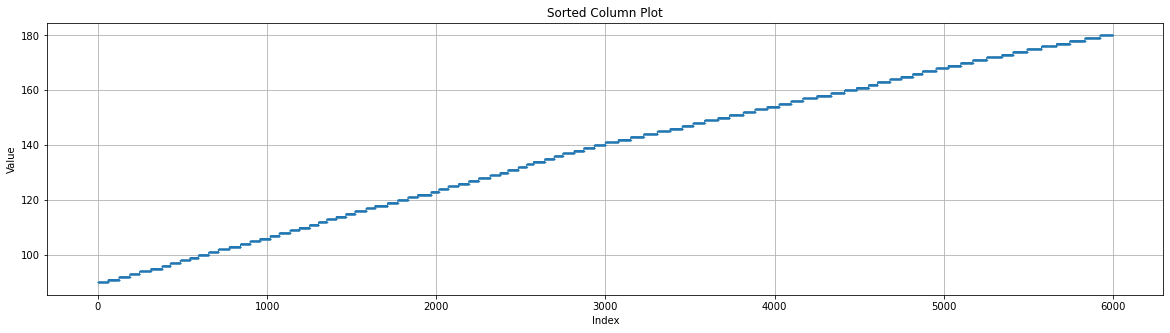

In [99]:
total = pd.concat([lower, higher], axis=0)
total.reset_index(drop=True, inplace=True)

column_to_plot = total.iloc[:, 1002] 
sorted_column = np.sort(column_to_plot)

# Create a plot
plt.figure(figsize=(20, 5))
plt.plot(sorted_column, marker='o', linestyle='-', linewidth=1.0, markersize=0.5)
plt.title('Sorted Column Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [92]:
def signal2matrix(total):
    total = total.values

    numberOfLines = len(total)
    returnMat = np.zeros((numberOfLines, 1003))
    classLabelVector = []
    index = 0

    for line in total:
        returnMat[index, :1002] = line[:1002]
        returnMat[index, 1002] = line[1003]
        if 90 <=line[1002]< 140:
            classLabelVector.append(1)
        elif 140 <=line[1002]<= 180:
            classLabelVector.append(2)
        index += 1
    return returnMat, classLabelVector

In [98]:
signalDataMat,signalLabels = signal2matrix(total)

In [37]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [38]:
normMat, ranges, minVals = autoNorm(signalDataMat)

Then, random the index to select 80\% of total sample as the "current points", while the other 20\% of total sample as the "query points". 

The following work is supposed to be predict the testing set labels based on current training dataset, using 1000-d signal, HR, RR, DBP as predictors. Now run the code below to implement this.

In [121]:
def SystolicClassTest(filename):
    total = filename
    signalDataMat,signalLabels = signal2matrix(filename)

    all_indices = np.arange(total_samples)
    np.random.shuffle(all_indices)
    
    hoRatio = 0.20
    normMat, ranges, minVals = autoNorm(signalDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    
    tmp  = pd.DataFrame(normMat)
    t = tmp.iloc[all_indices]
    normMat = t.values
      
    
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], 
                                     signalLabels[numTestVecs:m], 4)
        # print("the classifier came back with:%s\tthe real answer is:%d" % (classifierResult, signalLabels[i]))
        if classifierResult != signalLabels[i]:
            errorCount += 1.0
    print("the total error rate is:%f%%" %(errorCount/float(numTestVecs)*100))

In [ ]:
SystolicClassTest(total)

The error rate of classification is pretty large, which implies there exists some parts in our kNN algorithm to be optimized. 

<a name='22'></a>
### 2-2 Cosine Similarity

Euclidean distance (L2 norm) might not be an appropriate choice for measuring the closeness of signals in many cases, especially when dealing with high-dimensional data like 1000-dimensional signals. This is due to a phenomenon known as the "curse of dimensionality."

The "curse of dimensionality" refers to the fact that as the number of dimensions increases, the Euclidean distance between data points becomes less meaningful and tends to lose its discriminatory power. In high-dimensional spaces, data points become increasingly spread out, and the relative differences in distances between points become less informative. As a result, Euclidean distance can lead to poor performance in high-dimensional spaces because it may not effectively capture the true similarity between signals.

To address this issue, we might consider alternative distance metrics that are more suitable for high-dimensional data, like **Cosine Similarity**.

Cosine similarity measures the angle between two vectors rather than their absolute distances. It is less affected by the curse of dimensionality and can be a better choice for high-dimensional data.

The mathematical formula for Cosine Similarity between two vectors A and B is calculated as follows:

$$
cos(\theta) = \frac{A \cdot B }{ ||A|| \times ||B||}
$$

where

 - $A \cdot B$ is the dot product of vectors $A$ and $B$, which is the sum of the element-wise products of the two vectors.
 - $||A||$ represents the Euclidean (L2) norm or magnitude of vector $A$. It is calculated as the square root of the sum of the squares of the elements in vector $A$.
 - $||B||$ similarly, this represents the Euclidean (L2) norm or magnitude of vector $B$.

The Cosine Similarity measure returns a value between -1 and 1, where:

 - If $cos(\theta)$ = 1, it means the vectors are identical.
 - If $cos(\theta)$ = 0, it means the vectors are orthogonal (no similarity)
 - If $cos(\theta)$ = -1, it means the vectors are diametrically opposed.

Now run the code below to check the Cosine Similarity between two vectors in total dataset. Feel free also to change the index value and re-run to see Cosine Similarity between other two vectors.

In [116]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity([total.iloc[0,:]], [total.iloc[1,:]])[0][0] # change index "total.iloc[0,:]"
similarity

0.9894657007075016

A cosine similarity of 0.9894657007075016 indicates a high degree of similarity between the two vectors that were compared. In the context of cosine similarity, values close to 1 indicate strong similarity.

In our case, with a similarity of approximately 0.989, it suggests that the two 1003-dimensional signals we compared are very similar in direction when viewed as vectors in a high-dimensional space. 

<a name='23'></a>
### 2-3 Implement kNN on Synthetic data

In [135]:
def classify1(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    distances = []
    
    for i in range(dataSetSize):
        similarity = cosine_similarity([inX], [dataSet[i,:]])[0][0]
        distances.append(similarity)
    
    distances = np.array(distances)
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),
        key=operator.itemgetter(1), reverse=True)

    return sortedClassCount[0][0]

We change the distance in old knn algorithm function to cosine similarity. Run the code below to check whether the first sample in total dataset will be classified correctly.

In [139]:
signalDataMat,signalLabels = signal2matrix(total)
classify1(signalDataMat[0,:], signalDataMat[1:,], signalLabels, 4)

1

Yes! The first sample in total dataset is classified correctly. We can continue on finishing the testing function.

In [140]:
def SystolicClassTestCS(filename):
    total = filename
    signalDataMat,signalLabels = signal2matrix(filename)

    all_indices = np.arange(total_samples)
    np.random.shuffle(all_indices)
    
    hoRatio = 0.20
    normMat, ranges, minVals = autoNorm(signalDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    
    tmp  = pd.DataFrame(normMat)
    t = tmp.iloc[all_indices]
    normMat = t.values
      
    
    for i in range(numTestVecs):
        classifierResult = classify1(normMat[i,:], normMat[numTestVecs:m,:], 
                                     signalLabels[numTestVecs:m], 4)
        # print("the classifier came back with:%s\tthe real answer is:%d" % (classifierResult, signalLabels[i]))
        if classifierResult != signalLabels[i]:
            errorCount += 1.0
    print("the total error rate is:%f%%" %(errorCount/float(numTestVecs)*100))

In [ ]:
SystolicClassTestCS(total)

The result is even worse. Any other ways to define closeness? Or reduce dimension?

<a name='3'></a>
### 3 - A Typical Example -- Dating DataSet

In [43]:
def file2matrix(filename):
    fr = open(filename,'r',encoding = 'utf-8')
    arrayOLines = fr.readlines()
    arrayOLines[0]=arrayOLines[0].lstrip('\ufeff')
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines,3))
    classLabelVector = []
    index = 0

    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

In [44]:
datingDataMat,datingLabels = file2matrix('datingTestSet.txt')

In [45]:
from matplotlib.font_manager import FontProperties
def showdatas(datingDataMat, datingLabels):
    font = FontProperties(size=14) 
    fig, axs = plt.subplots(nrows=3, ncols=1,sharex=False, sharey=False, figsize=(8,18))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
            
    axs[0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    axs0_title_text = axs[0].set_title('Flyier Miles v.s. Time Playing Video Games')
    axs0_xlabel_text = axs[0].set_xlabel('Frequent Flyier Miles Earned Per Year')
    axs0_ylabel_text = axs[0].set_ylabel('Percentage of Time Playing Video Games')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red')  
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')  
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black') 
    
    axs[1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    axs1_title_text = axs[1].set_title('Flyier Miles v.s. Ice Cream Consumed Per Week')
    axs1_xlabel_text = axs[1].set_xlabel('Frequent Flyier Miles Earned Per Year')
    axs1_ylabel_text = axs[1].set_ylabel('Liters of Ice Cream Consumed Per Week')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')  
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')  
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black') 

    axs[2].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    axs2_title_text = axs[2].set_title('Time Playing Video Games v.s. Ice Cream Consumed Per Week')
    axs2_xlabel_text = axs[2].set_xlabel('Percentage of Time Playing Video Games')
    axs2_ylabel_text = axs[2].set_ylabel('Liters of Ice Cream Consumed Per Week')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')  
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')  
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black') 
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                               markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                               markersize=6, label='largeDoses')

    axs[0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[2].legend(handles=[didntLike,smallDoses,largeDoses])
    
    plt.show()

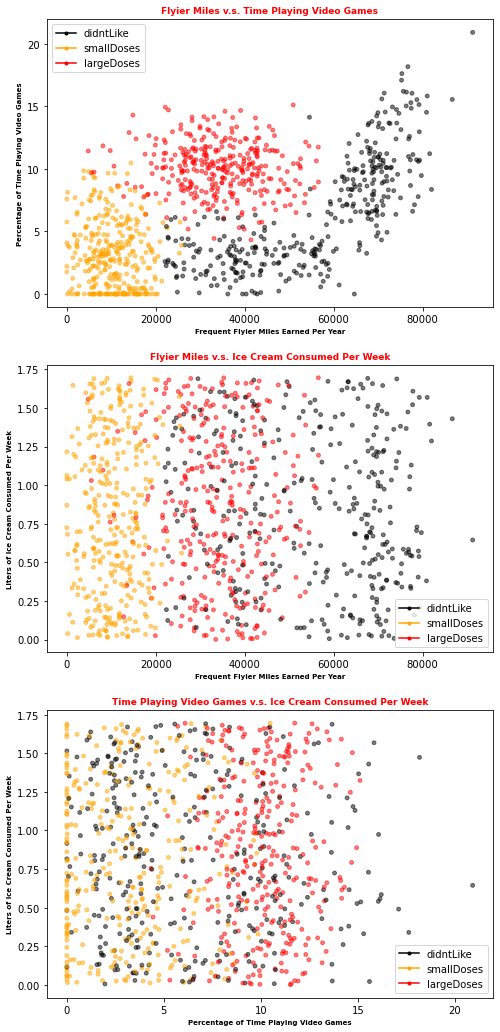

In [46]:
showdatas(datingDataMat, datingLabels)

In [100]:
def datingClassTest():
    filename = "datingTestSet.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    hoRatio = 0.10
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], 
                                     datingLabels[numTestVecs:m], 4)
        #print("the classifier came back with:%s\tthe real answer is:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("the total error rate is:%f%%" %(errorCount/float(numTestVecs)*100))

In [101]:
datingClassTest()

the total error rate is:4.000000%


In [49]:
def classifyPerson():
    resultList = ['not at all','in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-\
                   minVals)/ranges,normMat,datingLabels,3)
    print ("You will probably like this person: ",\
                   resultList[classifierResult - 1])

In [50]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person:  in small doses
